# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data decribes the rate,verbal,math SAT scores in every state in the US

##### 2. Does the data look complete? Are there any obvious issues with the observations?

there are not missing observations but most SAT candidates were more concentrated in few states

##### 3. Create a data dictionary for the dataset.

|column number| column name|type|Description|
|---                       
|1        |          State| String| Abbreviated state names|
|---                                                     |
|2        |          Rate|Int    |Percent of participation in rate|
|---                                                            |
|3         |          Verbal|Int  | Average Verbal score in sat|
|---        |
|4         |          Math  | Int | Average Math score in sat|

In [6]:
# AT - great data dictionary, but the column number column is not needed and don't add an empty row between

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [7]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd
import math
%matplotlib inline

scores_csv_path = 'assets/sat_scores.csv'

import csv
rows = []
with open(scores_csv_path, 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)




##### 5. Print the data

In [8]:
rows

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [9]:

header = rows[0]
header
remove_labels = rows[1:]
remove_labels

[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL', '12', '576', '589'],
 ['KY', '12', 

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [10]:
stateNames = [r.pop(0) for r in remove_labels] #takes the first row and removes it from data
print stateNames
#rows= np.array(rows)

#list1 =[]
#for i in rows:
    #list1.append((i[0]))
    
#print(list1)

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


##### 8. Print the types of each column

In [11]:
print type(stateNames[0])
print type(stateNames[1])
print type(stateNames[2])
print type(stateNames[3])
print type(remove_labels[1])


<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'list'>


In [12]:
# AT - If stateNames is a list of state abbreviations, then they will all be strings. 
# We want the types of the State column, the Math column, verbal, and rate

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [13]:
data1 = [[int(float(j)) for j in i] for i in remove_labels] #since it is a list of lists two for loops are necessary
data1

#use straight 'int' because it is discrete. Float is an argument for rate only.

[[82, 509, 510],
 [81, 499, 513],
 [79, 511, 515],
 [77, 495, 505],
 [72, 520, 516],
 [71, 501, 499],
 [71, 500, 499],
 [69, 511, 506],
 [69, 506, 500],
 [68, 510, 501],
 [67, 501, 499],
 [65, 508, 510],
 [65, 493, 499],
 [63, 491, 489],
 [60, 499, 501],
 [57, 486, 488],
 [56, 482, 474],
 [55, 526, 526],
 [54, 498, 499],
 [53, 527, 527],
 [53, 493, 499],
 [52, 485, 515],
 [51, 514, 510],
 [51, 498, 517],
 [34, 523, 525],
 [33, 509, 515],
 [31, 539, 542],
 [26, 534, 439],
 [23, 539, 539],
 [18, 527, 512],
 [17, 543, 542],
 [13, 562, 553],
 [13, 551, 542],
 [12, 576, 589],
 [12, 550, 550],
 [11, 547, 545],
 [11, 561, 572],
 [9, 580, 589],
 [9, 577, 580],
 [9, 559, 554],
 [8, 562, 568],
 [8, 567, 561],
 [8, 577, 577],
 [7, 564, 562],
 [6, 584, 596],
 [6, 562, 550],
 [5, 575, 570],
 [5, 593, 603],
 [4, 577, 582],
 [4, 592, 599],
 [4, 566, 551],
 [45, 506, 514]]

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [14]:
#  state_data ={}
# for index,column_name in enumerate(header):
#     state_data[column_name] = []
#     for row in rows:
#         state_data[column_name].append(row[index])
#         state_data
dict_map ={key:value for key,value in zip(stateNames, [data1[i][0:] for i in range(0,len(data1))])} 
dict_map

{'AK': [51, 514, 510],
 'AL': [9, 559, 554],
 'AR': [6, 562, 550],
 'AZ': [34, 523, 525],
 'All': [45, 506, 514],
 'CA': [51, 498, 517],
 'CO': [31, 539, 542],
 'CT': [82, 509, 510],
 'DC': [56, 482, 474],
 'DE': [67, 501, 499],
 'FL': [54, 498, 499],
 'GA': [63, 491, 489],
 'HI': [52, 485, 515],
 'IA': [5, 593, 603],
 'ID': [17, 543, 542],
 'IL': [12, 576, 589],
 'IN': [60, 499, 501],
 'KS': [9, 577, 580],
 'KY': [12, 550, 550],
 'LA': [7, 564, 562],
 'MA': [79, 511, 515],
 'MD': [65, 508, 510],
 'ME': [69, 506, 500],
 'MI': [11, 561, 572],
 'MN': [9, 580, 589],
 'MO': [8, 577, 577],
 'MS': [4, 566, 551],
 'MT': [23, 539, 539],
 'NC': [65, 493, 499],
 'ND': [4, 592, 599],
 'NE': [8, 562, 568],
 'NH': [72, 520, 516],
 'NJ': [81, 499, 513],
 'NM': [13, 551, 542],
 'NV': [33, 509, 515],
 'NY': [77, 495, 505],
 'OH': [26, 534, 439],
 'OK': [8, 567, 561],
 'OR': [55, 526, 526],
 'PA': [71, 500, 499],
 'RI': [71, 501, 499],
 'SC': [57, 486, 488],
 'SD': [4, 577, 582],
 'TN': [13, 562, 553],

In [15]:
# AT - Very nice job. This code is very succint.

##### 11. Create a dictionary with the values for each of the numeric columns

In [16]:
dict_1 ={key:value for key,value in zip(header[1:4], [[data1[i][j] for i in range(0,len(data1))] 
                                                            for j in range (0,3)])}
print dict_1
                                                            


{'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506]}


# Step 3: Describe the data

##### 12. Print the min and max of each column

In [17]:
totalRow=data1[-1] #creates a list for the total values 
data2=data1[:51] # makes a list without total values

rateCol=[r.pop(0) for r in data2] #removes the first column and assigns it to rateCol
verbalCol=[r.pop(0) for r in data2] #removes the first column and assigns it to verbalCol
mathCol=[r.pop(0) for r in data2] ##removes the first column and assigns it to mathCol

In [18]:
print 'Rate: The max is %d and the min is %d' %(max(rateCol), min(rateCol))

print 'Verbal: The max is %d and the min is %d' %(max(verbalCol), min(verbalCol))

print 'Math: The max is %d and the min is %d' %(max(mathCol), min(mathCol))

Rate: The max is 82 and the min is 4
Verbal: The max is 593 and the min is 482
Math: The max is 603 and the min is 439


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [19]:
def stdev(nums):
    cnt = len(nums)
    avg = float(sum(nums))/cnt
    return (sum((x-avg)**2.0 for x in nums)/(cnt-1))**0.5
print "The Standard Deviation of Rate is: %r"%(stdev(rateCol))#%r for raw number #np.std(rateCol,ddof=1)
print "The Standard Deviation of Verbal is: %r"%(stdev(verbalCol))#np.std(verbalCol,ddof=1)
print "The Standard Deviation of Math is: %r"%(stdev(mathCol))#np.std(mathCol,ddof=1)

The Standard Deviation of Rate is: 27.550680572356104
The Standard Deviation of Verbal is: 33.360667224248665
The Standard Deviation of Math is: 36.28739315465888


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

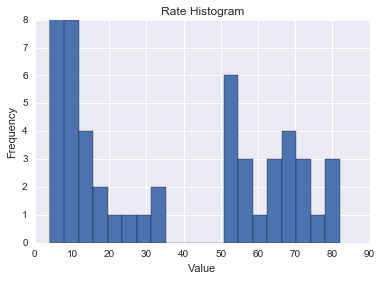

In [20]:
import matplotlib.pyplot as plt

plt.hist(rateCol,bins=20)
plt.title("Rate Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")


plt.show()

##### 15. Plot the Math distribution

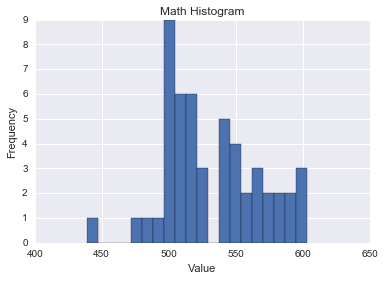

In [21]:
plt.hist(mathCol,bins=20)
plt.title("Math Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

##### 16. Plot the Verbal distribution

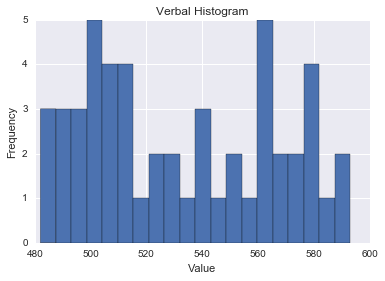

In [22]:
plt.hist(verbalCol,bins=20)
plt.title("Verbal Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")


plt.show()

In [ ]:
# AT - for each plot, add a sentence or two describe what is interesting about it.

##### 17. What is the typical assumption for data distribution?

In [ ]:
We assume that the distribution is normal

##### 18. Does that distribution hold true for our data?

In [ ]:
No.Our dataset is not normally distributed

In [ ]:
# make 17 and 18 markdown cells next time.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.


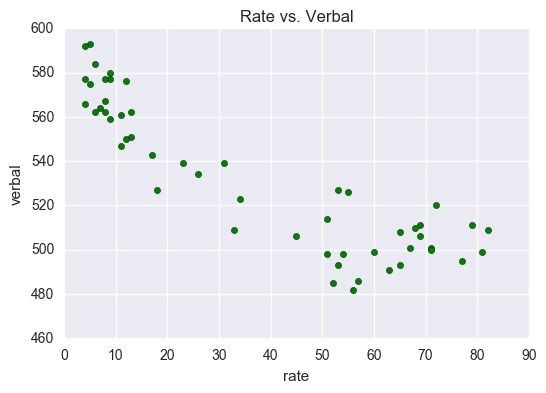

In [94]:
plt.scatter(dict_1['Rate'], dict_1['Verbal'], c='green')
plt.xlabel('rate')
plt.ylabel('verbal')
plt.title('Rate vs. Verbal')
plt.grid(True)

plt.show()

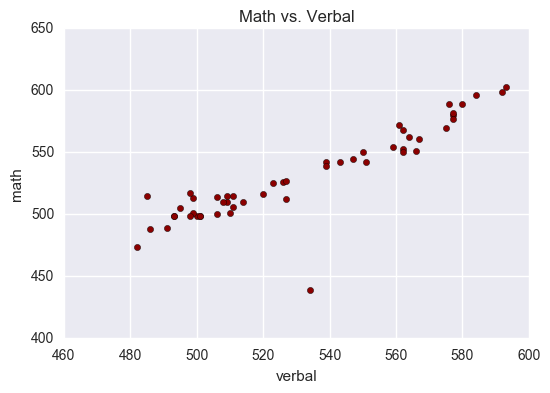

In [98]:
plt.scatter(dict_1['Verbal'], dict_1['Math'], c='darkred')
plt.xlabel('verbal')
plt.ylabel('math')
plt.title('Math vs. Verbal')
plt.grid(True)

plt.show()

In [23]:
# AT - for example, tell me about this outlier or the relationship between math and verbal

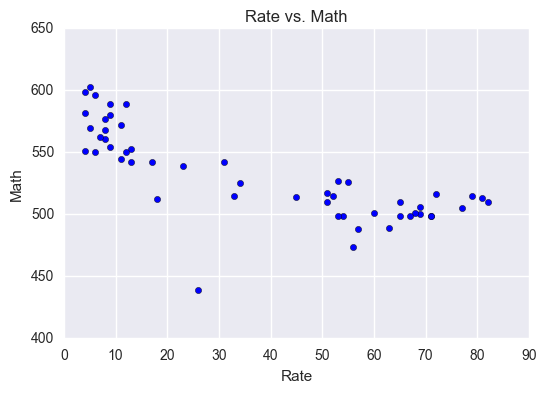

In [102]:
plt.scatter(dict_1['Rate'], dict_1['Math'], c='blue')
plt.xlabel('Rate')
plt.ylabel('Math')
plt.title('Rate vs. Math')
plt.grid(True)

plt.show()

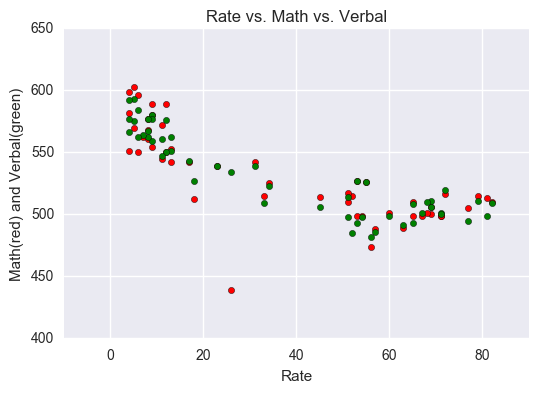

In [107]:
plt.scatter(dict_1['Rate'], dict_1['Math'], c='red')
plt.scatter(dict_1['Rate'], dict_1['Verbal'], c='green')
plt.xlabel('Rate')
plt.ylabel('Math(red) and Verbal(green)')
plt.title('Rate vs. Math vs. Verbal')
plt.grid(True)

plt.show()

Scatterplots for Rate vs Math and Verbal scores


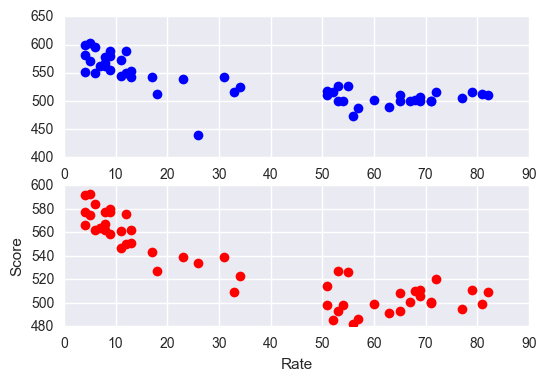

In [108]:
print "Scatterplots for Rate vs Math and Verbal scores"
plt.figure(1)



plt.subplot(211)
plt.plot(rateCol, mathCol, 'bo',)

plt.subplot(212)
plt.plot(rateCol, verbalCol, 'ro')

plt.xlabel('Rate')
plt.ylabel('Score')


plt.show()


##### 20. Are there any interesting relationships to note?

In [ ]:

Yes, as the rate of participation in the exam is lower the scores tend to be higher. 
This can be explained by the quality of students that take the exam. In those states
were the participation is low, only the best students tend to take the exams. 
If only the best students take the exams, the average scores are going to be higher 
than in those states where there are good and bad scoring students.

In [ ]:
# AT - Nice observation. make the above a markdown cell. Use these whenever there is no code in the cell.

##### 21. Create box plots for each variable. 

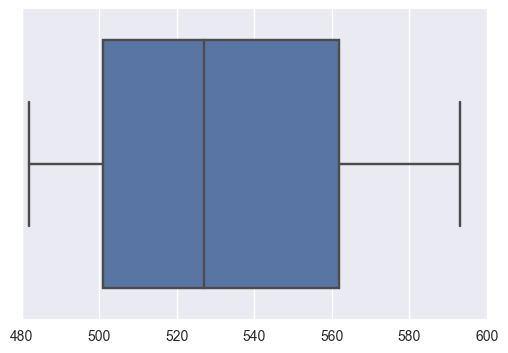

In [114]:
#using seaborn
sns.boxplot(verbalCol)

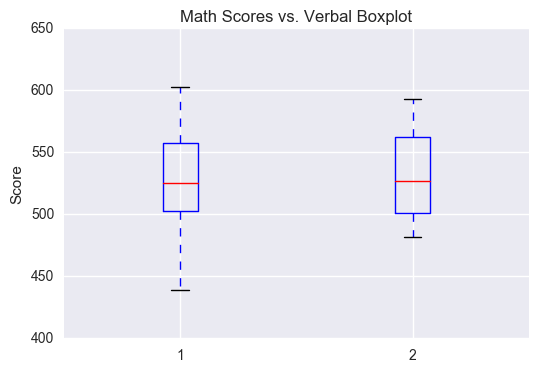

In [115]:
plt.boxplot([mathCol,verbalCol])
plt.ylabel('Score')
plt.title('Math Scores Boxplot')
plt.ylabel('Score')
plt.title('Math Scores vs. Verbal Boxplot')
plt.show()

In [ ]:
# AT - be sure to label the x axis next time, so i Kno which is verbal and which is math

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

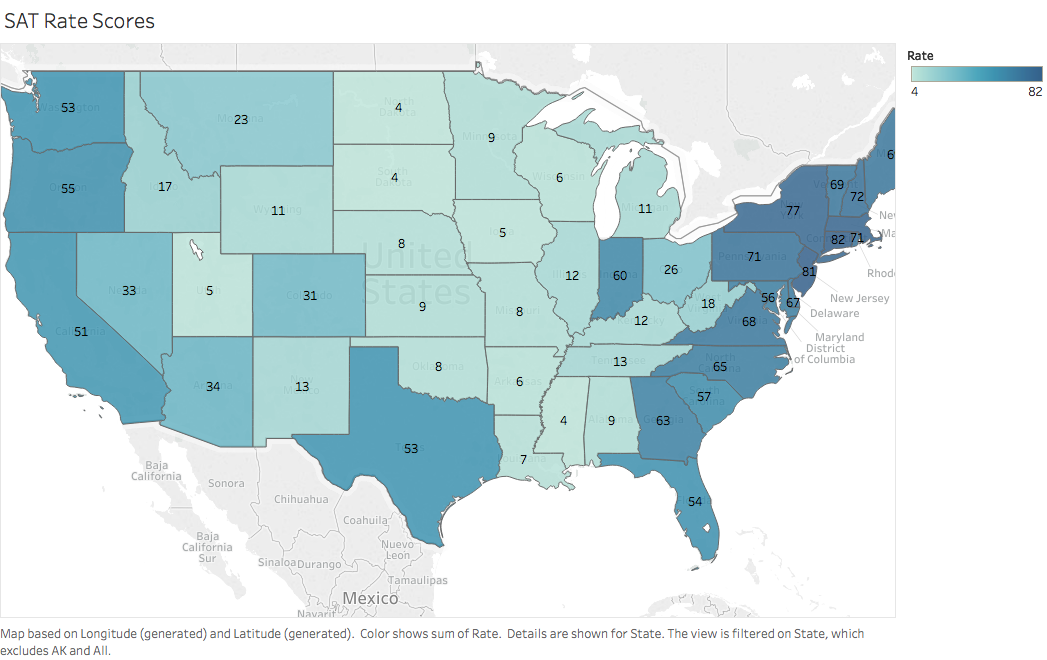

In [109]:
from IPython.display import Image
Image('assets/SAT Rate.png')

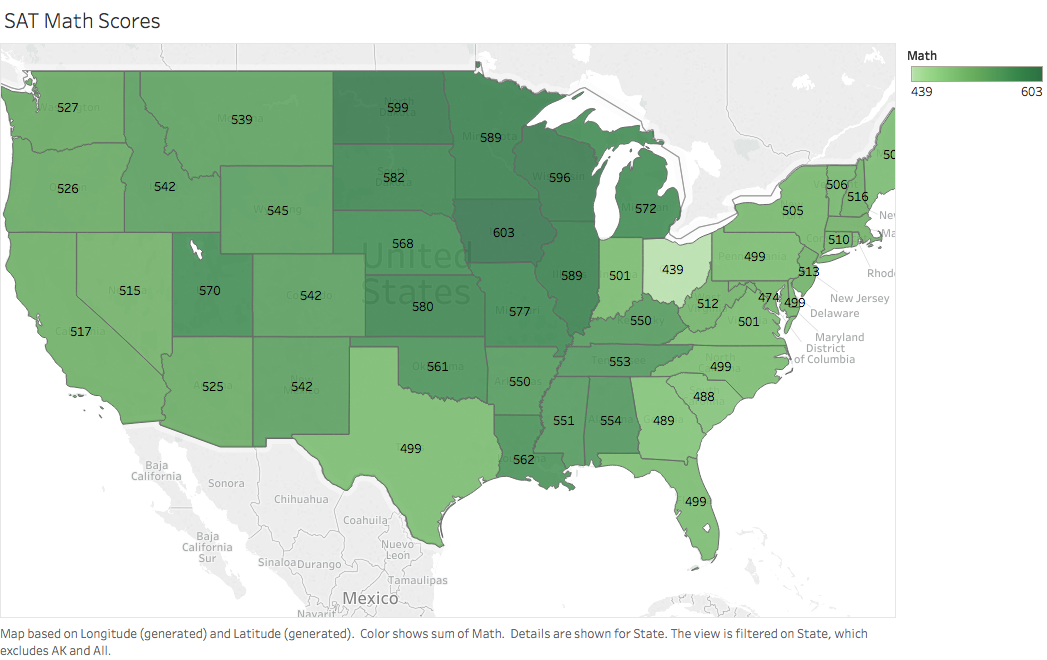

In [112]:
Image('assets/SAT Math.png')

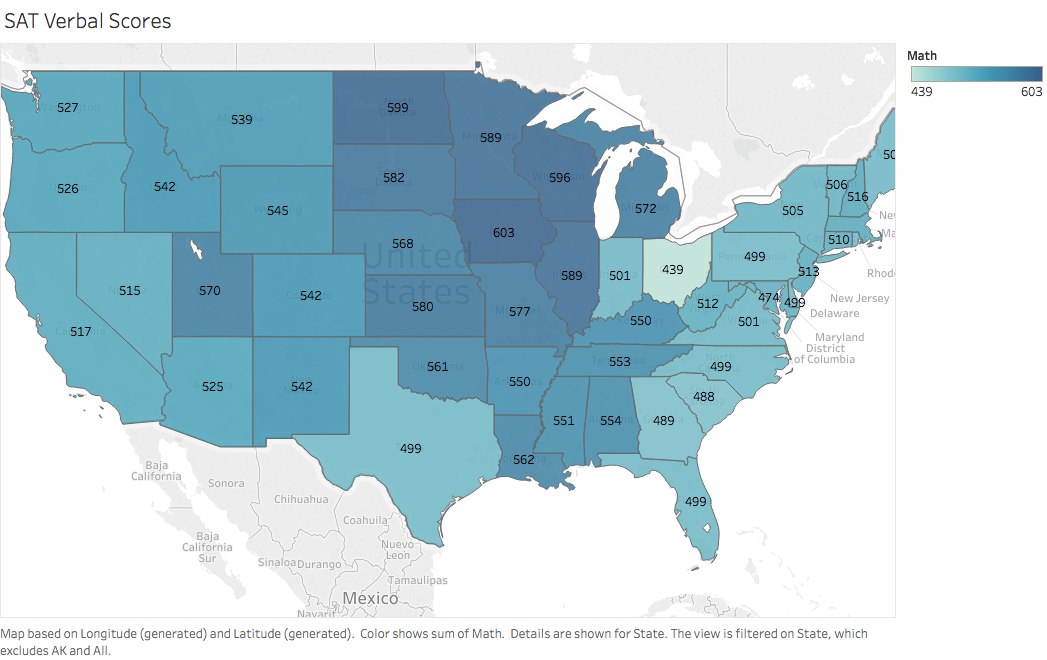

In [113]:
Image('assets/SAT Verbal.png')

In [ ]:
# AT - Nice visualizations! Next time try not to cut off Maine though.

Score | 16/18
------|------
Identify: Discuss Data        | 3       
Acquire: Load Data with Python        | 3
Parse: Print Data            | 3
Mine: Sort Data                | 3
Refine: Analyze Data                | 2
Present: Visualize Data/Tableau            | 2
Bonus! Present: Create blog post summary | 0 